<a href="https://colab.research.google.com/github/vel688/MORINGA-CORE-WEEK8-HYPOTHYROIDISM/blob/main/DECISION_TREES_WEEK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TEST FOR HYPOTHYROIDISM
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


### a) Specifying the Question

As a Data Scientist,  I am expected to create a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism or not.

### b) Defining the Metric for Success
This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism. 

2)Select a model with highest accuracy, lowest error and no overfitting


### c) Understanding the context: 
This data contains real symptoms of patients. For this reason, I will not alter the values extremely. I shall retain them as they are because they are real accounts of their health status. This is to favour accuracy 

### d)Experimental Design
Data Cleaning

EDA-Univariate Analysis

EDA-Bivariate Analysis

EDA-Multivariate Analysis

Modelling

Decision Trees: 
(Random Forests , Ada Boosted Trees , Gradient Boosted Trees)

Support (Vector Machines: Kernel = polynomial , linear , rbf)

Conclusion

### e) Data Relevance
The data is relevant because it contains columns that are helpful in predicting whether a patient has hypothyroidism or not? For example, sex is a factor to consider according to this link https://www.medscape.com/answers/122393-11271/is-hypothyroidism-more-common-in-males-or-females#:~:text=Community%20studies%20use%20slightly%20different,8%20times%20higher%20in%20females. 


##2.LOADING DATA

In [3]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#loading and previewing the dataset 
hypothyroid = pd.read_csv('http://bit.ly/hypothyroid_data')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [55]:
hypothyroid.shape
#there are 26 rows and 3163 columns

(3163, 26)

In [5]:
#obtaining information about the dataset
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#describing the data.
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


 This character  ' ? ' appears many times. We cannot perform any analysis on the data thus we replace the special character with zeros. We shall not replace with modes or means because of the nature of our data as explained earlier.

##3.DATA CLEANING

###Missing Values

In [57]:
#There are no null values because they are disguised under this symbol '?'
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [60]:
#checking for missing values after replacing ? with null
hypothyroid_1 = hypothyroid.replace(['?'], np.nan)
hypothyroid_1.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

###Check for anomalies

Sex has 3 unique values so this needs to be investigated because there are only two known genders biologically

In [9]:
# Check the unique values in each column
# Using a for loop to iterate through the dataframe, 
# find the unique values in each column then print them out 


for column in hypothyroid_1.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(hypothyroid_1[column].unique())        # Printing out the unique values in each column
  print(hypothyroid_1[column].nunique())       # Printing out the number of unique values in each column
  print('\n............................')      # Creating a new line filled with . to separate the columns

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


We can see that,


Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [65]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them
# Creating two lists: An array of numerical columns and  of categorical columns

#creating a copy
hypothyroid_2 = hypothyroid_1

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_2.columns:
  if column in numerical_columns:
    hypothyroid_2[column]= pd.to_numeric(hypothyroid_2[column])
  
  else:
    hypothyroid_2[column] = hypothyroid_2[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_2.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

### Dropping  columns

In [67]:
hypothyroid_3 = hypothyroid_2.drop(['TBG','TBG_measured'], axis =1)
hypothyroid_3.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


###Replacing null values

In [68]:
#replace the null values in the age column with the mean age
#creating a copy
hypothyroid_4 = hypothyroid_3
hypothyroid_4['age']= hypothyroid_3['age'].fillna(hypothyroid_3['age'].mean(), axis = 0)

In [69]:
#replace the null values in the sex column with the modal value
#creating a copy
hypothyroid_5 = hypothyroid_4
hypothyroid_5['sex']= hypothyroid_4['sex'].fillna(hypothyroid_4['sex'].mode(), axis = 0)

Replacing the rest of the null values with zeros

In [70]:
#The null values are in all the numerical column
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#creating a copy
hypothyroid_6 = hypothyroid_5

#dropping the null values and assigning the resultant values to a new dataframe
hypothyroid_6[numerical_columns_2] = hypothyroid_5[numerical_columns_2].fillna(0)

###Check for duplicates

In [72]:
hypothyroid_6.duplicated().sum()

75

In [73]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints

hypothyroid_6.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped

hypothyroid_6.duplicated().any()

False

#4.EXPLORATORY DATA ANALYSIS

#Univariate Analysis

###Status column
This is the dependent variable which we are trying to predict.

 [ ' Hypothyroid ' ] indicates that the patient has hypothyroidism

while [ ' negative ' ] indicates that the patient doesnt have hypothyroidsm.

In [17]:
#['hypothyroid', 'negative']
hypothyroid_7.status.describe()

count         3011
unique           2
top       negative
freq          2870
Name: status, dtype: object

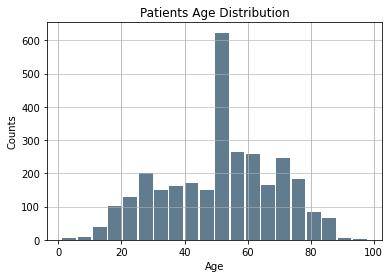

In [21]:
#HIATOGRAM
#visualizing age dirstibution
size, scale = 1000, 10
age = hypothyroid_7['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The distribution is fairly normal, and leptokurtic: the kurtosis is greater than normal.

The distribution is more concentrated around the mean

Text(0.5, 1.0, 'Boxplot of Age')

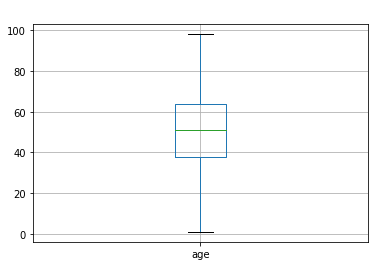

In [22]:
#checking for outliers using a boxplot
hypothyroid_7.boxplot(column=['age'])
plt.title("Boxplot of Age",fontsize=16,color="white")

There are no outliers in the data.

###Sex
This column gives the gender of the patients in the dataset

In [23]:
hypothyroid_7.sex.nunique()
#there are 30 unique values
hypothyroid_7.sex.describe()

count     2938
unique       2
top          F
freq      2049
Name: sex, dtype: object

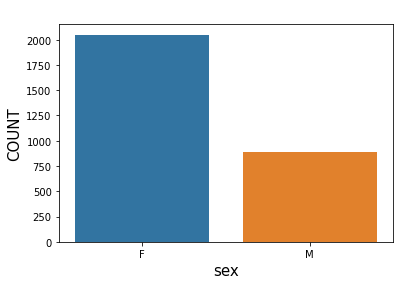

In [24]:
#visualizing the distribution of gender in the dataset
sb.countplot('sex',data = hypothyroid_7)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#

The female patients entries are more than double that of male patients: This may be because women are more prone to hypothyroidism than men.

#####Histograms

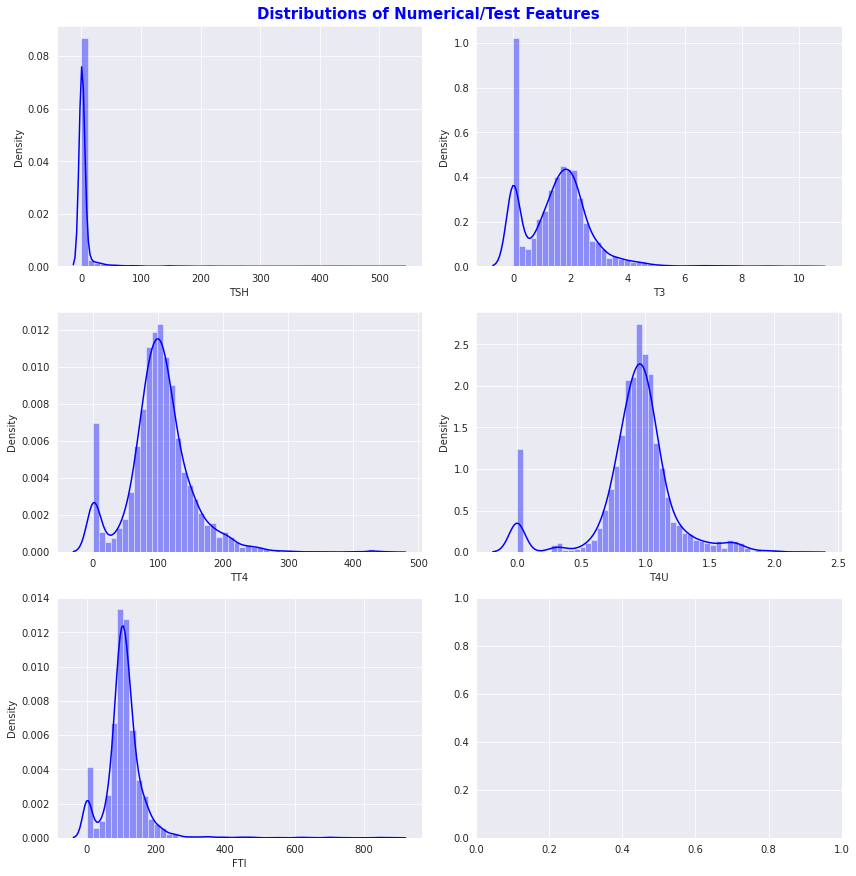

In [25]:
# Histograms of the numerical columns
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sb.distplot(hypothyroid_7[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

TSH, T3,TT4, and FT Columns are right skewed.

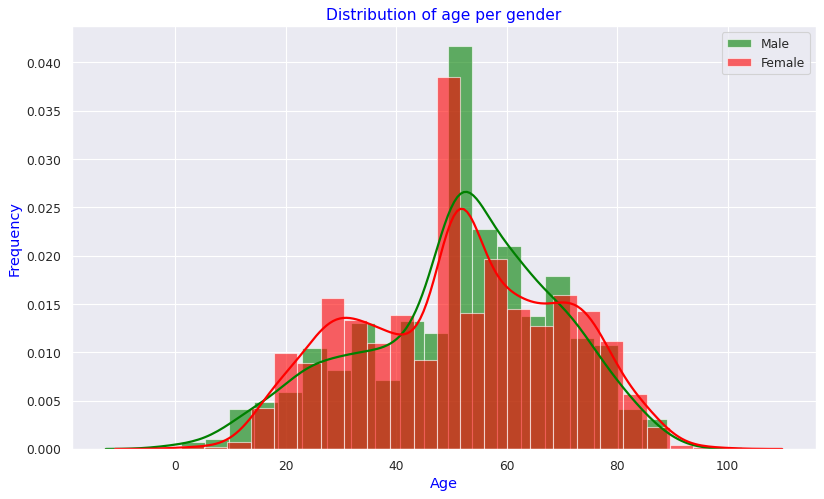

In [89]:
# Plotting histogram to show distribution of age per gender
# 
male = hypothyroid_6.loc[hypothyroid_6.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = hypothyroid_6.loc[hypothyroid_6.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sb.distplot(male, color="green", label="Male", **kwargs)
sb.distplot(female, color="red", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'blue')
plt.xlabel('Age', fontsize = 13, color = 'blue')
plt.ylabel('Frequency', fontsize = 13, color = 'blue')
plt.legend()
plt.show()

#####Box Plots

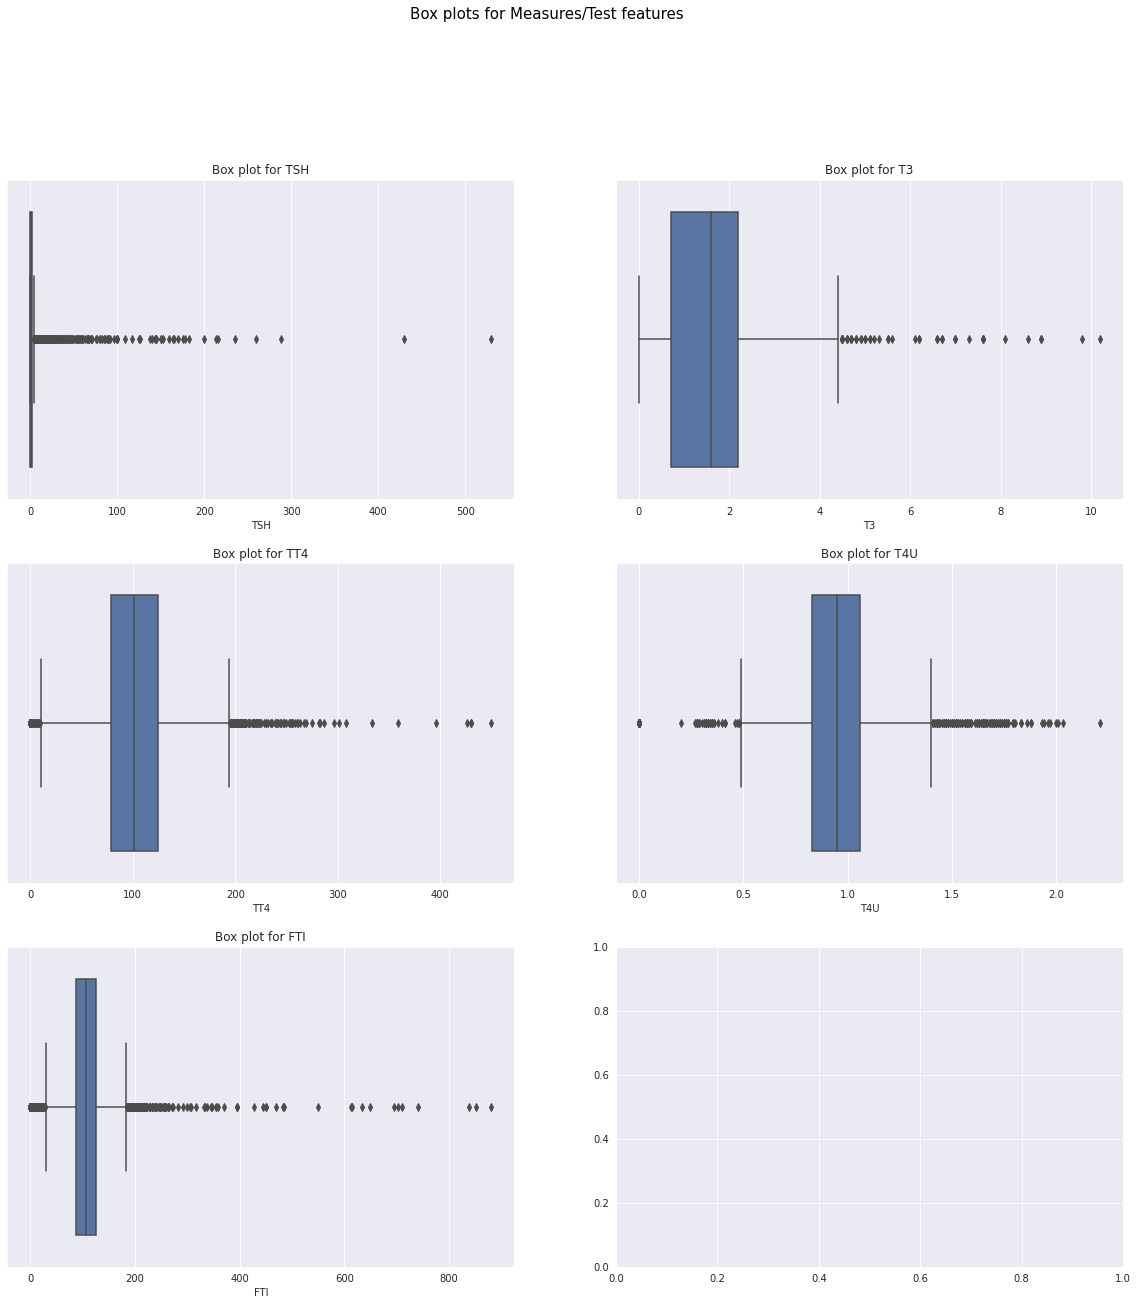

In [26]:
# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'black', fontsize = 15)

sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sb.boxplot(hypothyroid_7[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()


Outliers will not be dropped but used in modeeling

#####Countplots

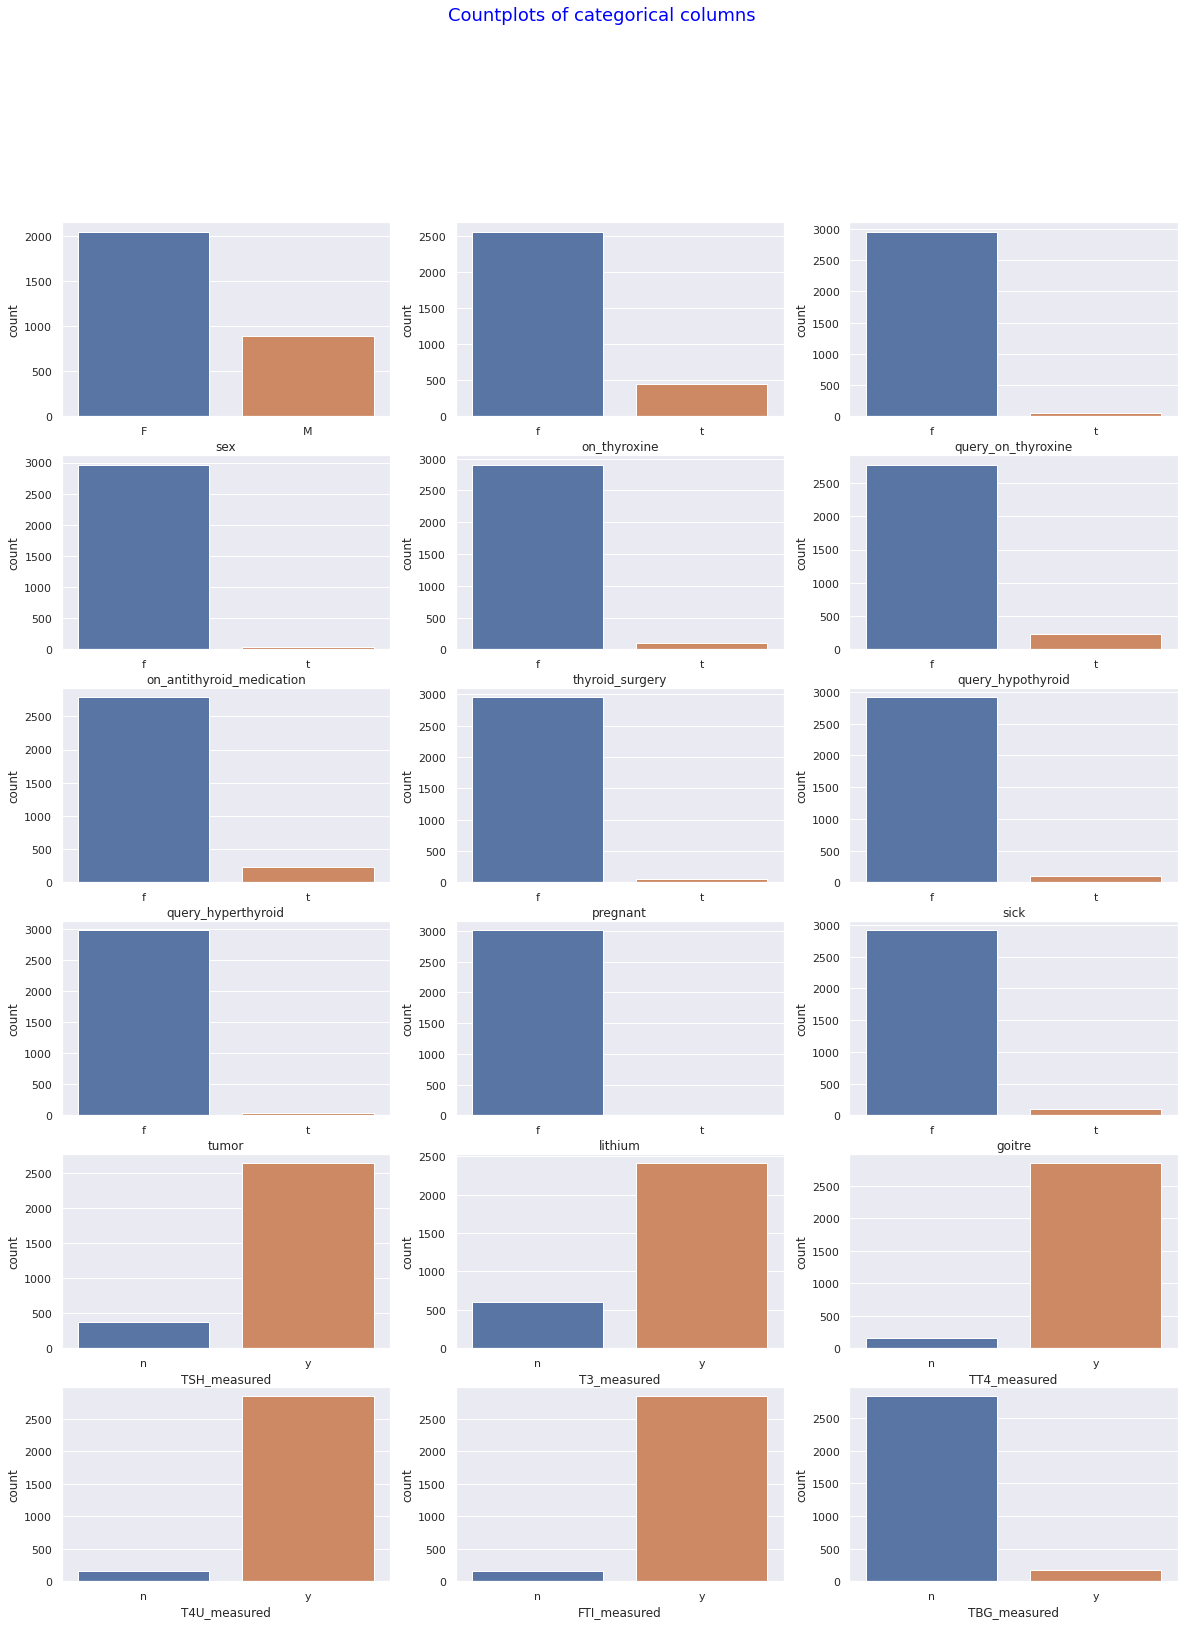

In [52]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = hypothyroid_7.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypothyroid_7, categorical_columns_1):
   sb.countplot(hypothyroid_7[column], ax=ax)

# Bivariate Analysis

## Checking for Multi-collinearity

In [53]:
# Let's display the correlations between the variables
corr = hypothyroid_7.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


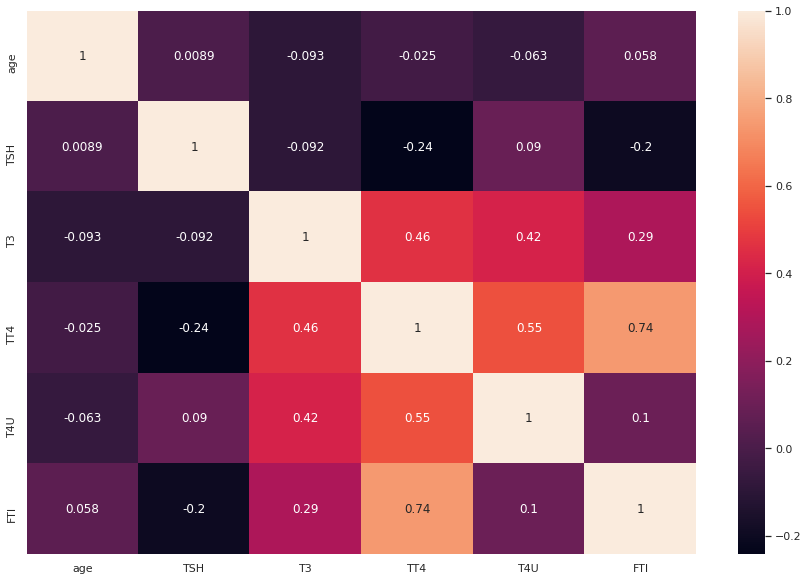

In [29]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

There is some  multi-collinearity like T3 and T4U ; TT4 and FT1 which have the strongest

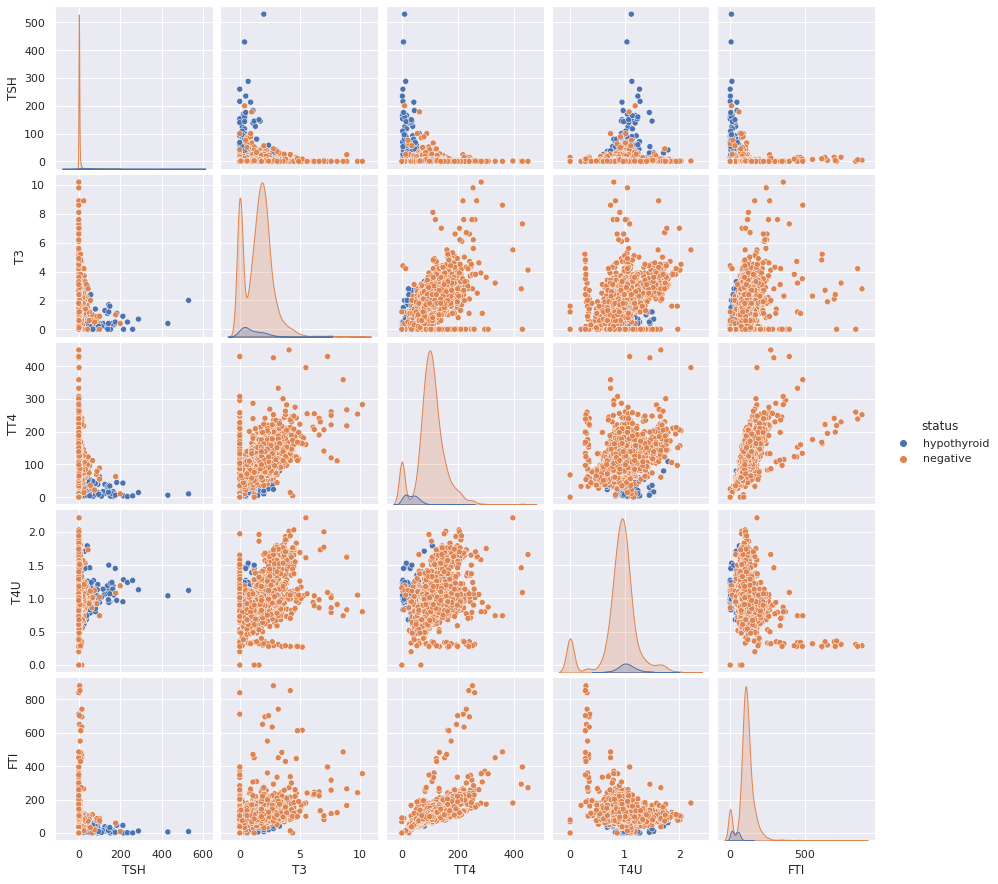

In [30]:
# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','T3','TT4','T4U','FTI']

sb.pairplot(hypothyroid_4, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()


#Multi-Variate Analysis

In [31]:
hypothyroid_7.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

##### Encoding

#####PCA

In [32]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = hypothyroid_7.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query_hyperthyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


The dataframe above shows 10 features that explain the most variance in the data, thyroid surgery being the highest

#5.MODELLING


####The Baseline Model: Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

y = hypothyroid_7.status.cat.codes
# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)


In [34]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.9856194690265486
F1_score, average = micro: 0.9856194690265486
F1_score, average = macro: 0.8992515881248555
F1_score, average = weighted: 0.9853099067294102


array([[ 27,   8],
       [  5, 864]])

The Baseline Model has an accuracy score of 98% as seen from the F1 score. 

We only check the micro and weighted scores since

micro:
    Calculates metrics globally by counting the total true positives, false negatives and false positives.

macro:
    Calculates metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

weighted:
    Calculates metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

##1.Decision Trees

##Random forests


In [99]:
# Selecting the independent variables and the target variable
#
X = hypothyroid_7.drop('status', axis = 1)
y = np.where(hypothyroid_7.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f' accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
#confusion_matrix(y_test, y_pred)

 accuracy score is: 0.9911504424778761 and the f1 score is 0.8787878787878788


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       869
           1       0.94      0.83      0.88        35

    accuracy                           0.99       904
   macro avg       0.96      0.91      0.94       904
weighted avg       0.99      0.99      0.99       904



In [100]:
#Feature importance
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
important_features = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_features

,importance
feature,
FTI,0.2847
TSH,0.2763
TT4,0.1506
T4U,0.0528
T3,0.0473
age,0.0340
TSH_measured_y,0.0217
TSH_measured_n,0.0164
T4U_measured_y,0.0120


In [106]:
#REMODELLING WITH IMPORTANT FEATURES
# Selecting only important features and the y variable
#
X = X[['age', 'TSH_measured_y', 'T4U_measured_y','FTI_measured_y','T3_measured_n',
       'FTI_measured_n','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]

y = np.where(hypothyroid_7.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
#confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9933628318584071 and the f1 score is 0.9142857142857143


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       0.91      0.91      0.91        35

    accuracy                           0.99       904
   macro avg       0.96      0.96      0.96       904
weighted avg       0.99      0.99      0.99       904



f1 score is now 91% from 87% and accuracy has also  increased a little 

In [107]:
#PARAMETER TUNING
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
# Creating a dictionary of parameters to tune
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [156]:
# Applying the best parameters to the model
#
# Selecting only important features and the y variable
#
X = X[['age', 'TSH_measured_y', 'T4U_measured_y','FTI_measured_y','T3_measured_n',
       'FTI_measured_n','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]
y = np.where(hypothyroid_7.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=30, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
#confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9911504424778761 and the f1 score is 0.8787878787878788


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       869
           1       0.94      0.83      0.88        35

    accuracy                           0.99       904
   macro avg       0.96      0.91      0.94       904
weighted avg       0.99      0.99      0.99       904



In [154]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.008849557522123894
Mean Squared Error: 0.008849557522123894
Root Mean Squared Error: 0.09407208683835973


In [157]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.76


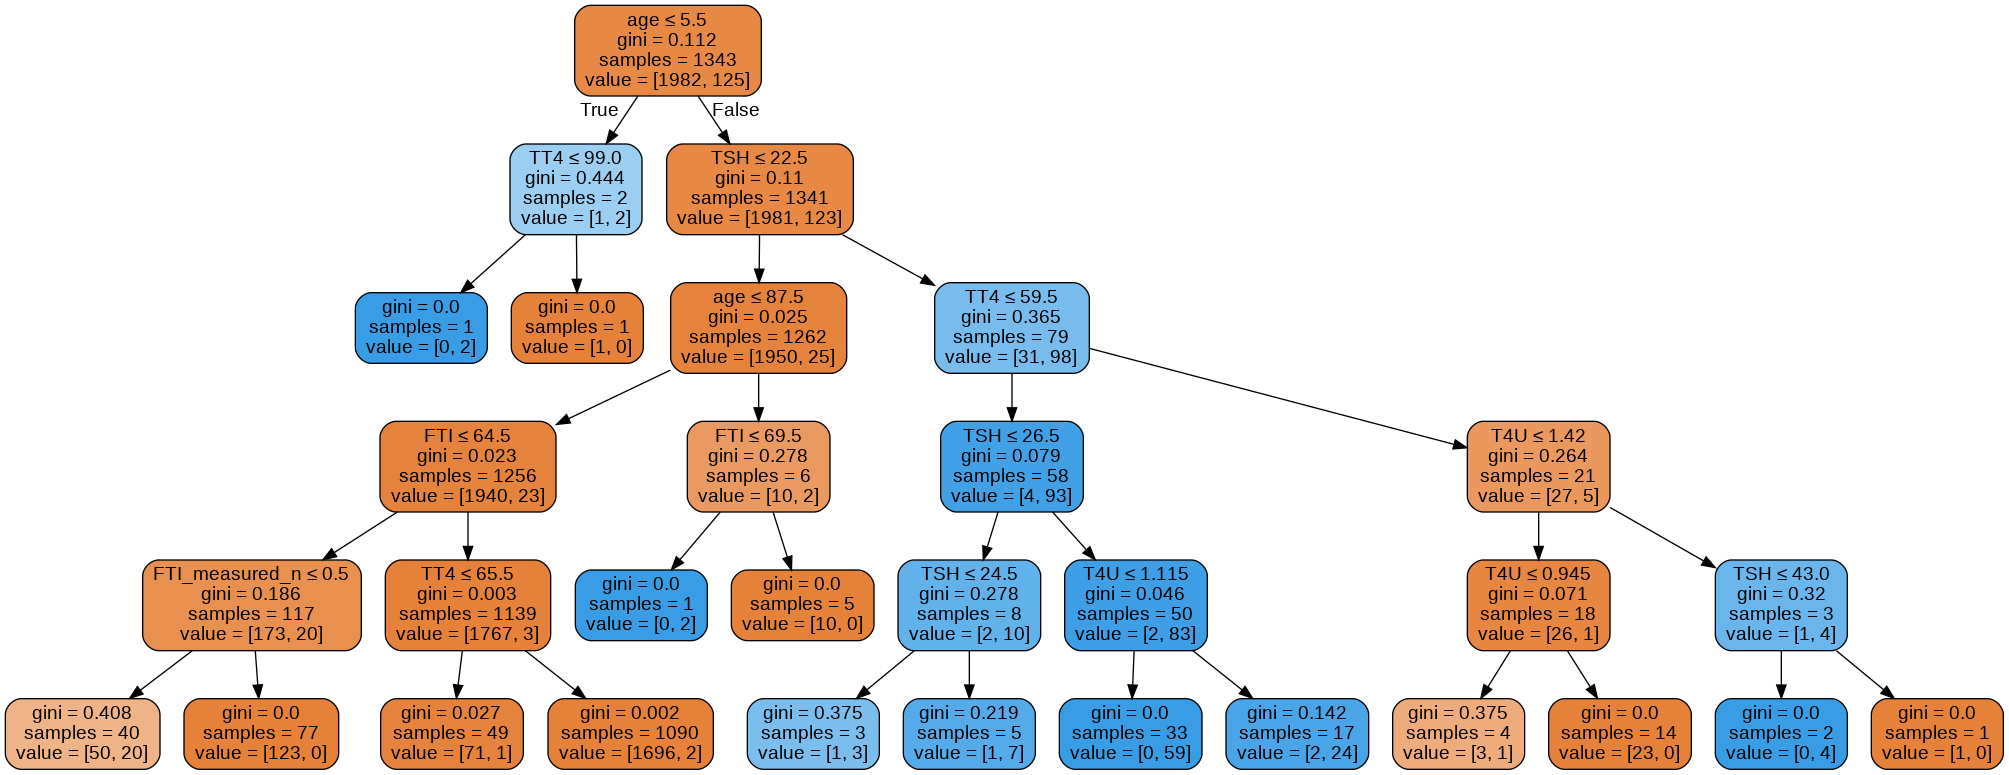

In [113]:
# picking the 3rd tree from the forest
tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

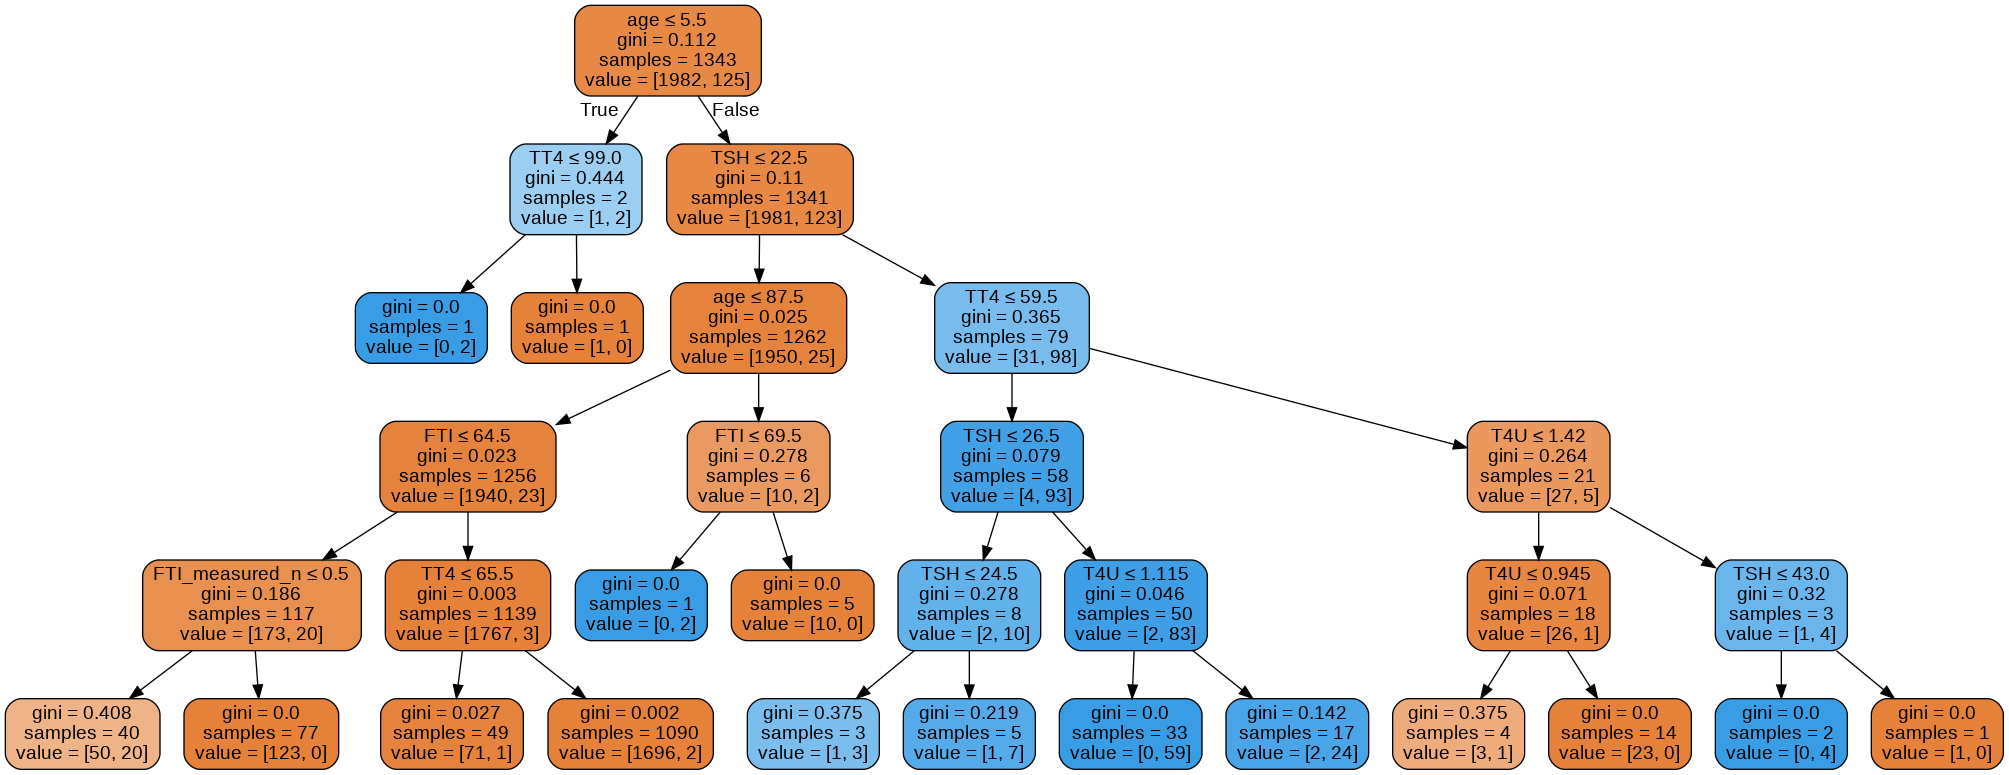

In [120]:
# picking the 3rd tree from the forest
tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Ada boosted trees

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
importantADA = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
importantADA

,importance
feature,
TSH,0.266667
age,0.233333
FTI,0.200000
T4U,0.133333
T3,0.100000
TT4,0.066667
TSH_measured_y,0.000000
T4U_measured_y,0.000000
FTI_measured_y,0.000000


In [134]:
# hyperparameter tuning
#Previewing the parameters to tune
#
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [136]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 100}


In [139]:
# Selecting only important features and the y variable
#
X = X[['age', 'TSH_measured_y', 'T4U_measured_y','FTI_measured_y','T3_measured_n',
       'FTI_measured_n','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]

y = np.where(hypothyroid_7.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

The accuracy score is: 0.9911504424778761 and the f1 score is 0.8787878787878788


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       869
           1       0.94      0.83      0.88        35

    accuracy                           0.99       904
   macro avg       0.96      0.91      0.94       904
weighted avg       0.99      0.99      0.99       904



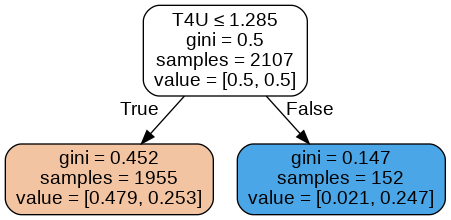

In [140]:
#visualise third stump
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [141]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))


R2 score : 0.76
accuracy_score: 0.9911504424778761
F1_score, average = micro: 0.9911504424778761
F1_score, average = macro: 0.9370977281425041
F1_score, average = weighted: 0.9908924342948909


In [142]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.008849557522123894
Mean Squared Error: 0.008849557522123894
Root Mean Squared Error: 0.09407208683835973


##gradient boosted trees

In [144]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
gradient = pd.DataFrame({'feature': X.columns, 'importance': gbc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
gradient

,importance
feature,
TSH,0.576670
FTI,0.244368
age,0.057132
T3,0.049754
TT4,0.047361
T4U,0.021159
TSH_measured_y,0.001423
T3_measured_n,0.001069
TSH_measured_n,0.001065


In [146]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

In [147]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.9612831858407079
F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


SUMMARY
TSH and FTI are top features in all models
gradient boost had the least accuracy of 96.12% while the others have 99.12%. Ada(99%), gradient boost (94%)and random forests (87%) had the F1 scores in that descending order.



## 2nd Approach: Support Vector Machines

##### kernel = polynomial

In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

In [ ]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

##### kernel = linear

In [46]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9878318584070797

In [47]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9878318584070797
F1_score, average = macro: 0.9171271178671734
F1_score, average = weighted: 0.9877471820711037


##### kernel = rbf

In [48]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9601769911504425

In [49]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9601769911504425
F1_score, average = macro: 0.489841986455982
F1_score, average = weighted: 0.9417537305978946


using TSH AND FTI which were top features in all models

In [ ]:
# Select the variables 
#
X = df[['FTI', 'TSH']].values
y = np.where(df.status == 'hypothyroid', 1, 0)


poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

##Hyperparameter tuning

In [ ]:
# Creating a dictionary of parameters to tune
#
SVC()
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = df[['fti', 'tsh']]
y = np.where(df.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

##applying optimal features

In [ ]:
# Selecting only important features and the y variable
#
X = df.drop('status', axis = 1)

y = np.where(df.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 21, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

##Cross validation

In [ ]:
# Performing cross validation of ten folds
#
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

##Challenging the Solution

In [50]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances
#the list below shows the most important features in the data and the value of how important they are.
# the most important feature is TT4 and it accounts for 79% importance

[('TT4', 0.79),
 ('TSH', 0.07),
 ('T3_measured_n', 0.07),
 ('FTI', 0.02),
 ('goitre_f', 0.02),
 ('T4U', 0.01),
 ('query_hyperthyroid_t', 0.01),
 ('age', 0.0),
 ('T3', 0.0),
 ('sex_F', 0.0),
 ('sex_M', 0.0),
 ('on_thyroxine_f', 0.0),
 ('on_thyroxine_t', 0.0),
 ('query_on_thyroxine_f', 0.0),
 ('query_on_thyroxine_t', 0.0),
 ('on_antithyroid_medication_f', 0.0),
 ('on_antithyroid_medication_t', 0.0),
 ('thyroid_surgery_f', 0.0),
 ('thyroid_surgery_t', 0.0),
 ('query_hypothyroid_f', 0.0),
 ('query_hypothyroid_t', 0.0),
 ('query_hyperthyroid_f', 0.0),
 ('pregnant_f', 0.0),
 ('pregnant_t', 0.0),
 ('sick_f', 0.0),
 ('sick_t', 0.0),
 ('tumor_f', 0.0),
 ('tumor_t', 0.0),
 ('lithium_f', 0.0),
 ('lithium_t', 0.0),
 ('goitre_t', 0.0),
 ('TSH_measured_n', 0.0),
 ('TSH_measured_y', 0.0),
 ('T3_measured_y', 0.0),
 ('TT4_measured_n', 0.0),
 ('TT4_measured_y', 0.0),
 ('T4U_measured_n', 0.0),
 ('T4U_measured_y', 0.0),
 ('FTI_measured_n', 0.0),
 ('FTI_measured_y', 0.0),
 ('TBG_measured_n', 0.0),
 ('TBG_m

Check for overfitting

## 9. Follow up questions

### a). Did we have the right data?
YES!

### b). Do we need other data to answer our question?
YES!it will be better understood if the columns had a description

#Conclusion

All the models achieved an accuracy score above 90%
